## **Deep Learning**

In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import layers,Input,Sequential
from keras.layers import Dense,Flatten,Reshape,Conv2DTranspose,Conv2D,MaxPooling2D,Reshape,Resizing
from tensorflow.keras import datasets, layers, models, losses, Model
from random import randint
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,Model


In [2]:
class CNN_Autoencoder(Model):
    def __init__(self):
        super(CNN_Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(200, 200, 3)),
            layers.Conv2D(8, 11, strides=5, padding='same', activation='relu'),
            layers.Conv2D(16, 5, strides=2, padding='same', activation='relu'),
            layers.Conv2D(32, 3, strides=1, padding='same', activation='relu')])

        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(32, 3, strides=1, padding='same', activation='relu'),
            layers.Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, 3, strides=5, padding='same', activation='sigmoid')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [3]:
cnn_autoencoder=CNN_Autoencoder()

In [4]:
cnn_autoencoder.build(input_shape=(None,200,200,3))

In [5]:
cnn_autoencoder.summary()

Model: "cnn__autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 20, 20, 32)        10768     
                                                                 
 sequential_1 (Sequential)   (None, 200, 200, 3)       14307     
                                                                 
Total params: 25075 (97.95 KB)
Trainable params: 25075 (97.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
cnn_autoencoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 8)         2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 16)        3216      
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
Total params: 10768 (42.06 KB)
Trainable params: 10768 (42.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
cnn_autoencoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 20, 20, 32)        9248      
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 40, 40, 16)        4624      
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 200, 200, 3)       435       
 Transpose)                                                      
                                                                 
Total params: 14307 (55.89 KB)
Trainable params: 14307 (55.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


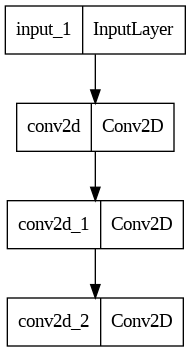

In [8]:
from keras.src.utils.vis_utils import plot_model

keras.utils.plot_model(cnn_autoencoder.encoder, "model.png")